## Everything everywhere all at once

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean

In [2]:
dust_caboverde_coarsen = xr.open_dataset("dust_caboverde_coarsen.nc")

In [3]:
ds_biochl = xr.open_dataset("ds_biochl.nc")

In [4]:
dust_caboverde_coarsen

<xarray.Dataset>
Dimensions:            (time: 80, lon: 66, lat: 50)
Coordinates:
  * lon                (lon) float64 -28.12 -27.88 -27.62 ... -12.12 -11.88
  * lat                (lat) float64 7.875 8.125 8.375 ... 19.62 19.88 20.12
    spatial_ref        int64 ...
  * time               (time) datetime64[ns] 2022-12-31 ... 2024-01-29
Data variables:
    Optical_Depth_047  (time, lon, lat) float64 ...
    Optical_Depth_055  (time, lon, lat) float64 ...

In [5]:
ds_biochl

<xarray.Dataset>
Dimensions:     (time: 80, latitude: 96, longitude: 128)
Coordinates:
  * latitude    (latitude) float64 8.063 8.188 8.313 8.438 ... 19.69 19.81 19.94
  * longitude   (longitude) float64 -27.94 -27.81 -27.69 ... -12.19 -12.06
  * time        (time) datetime64[ns] 2022-12-31 2023-01-05 ... 2024-01-29
Data variables:
    CHL         (time, latitude, longitude) float32 ...
    MICRO       (time, latitude, longitude) float32 ...
    MICRO_BIAS  (time, latitude, longitude) float32 ...
    MICRO_RMSE  (time, latitude, longitude) float32 ...
    NANO        (time, latitude, longitude) float32 ...
    NANO_BIAS   (time, latitude, longitude) float32 ...
    NANO_RMSE   (time, latitude, longitude) float32 ...
    PICO        (time, latitude, longitude) float32 ...
    PICO_BIAS   (time, latitude, longitude) float32 ...
    PICO_RMSE   (time, latitude, longitude) float32 ...
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

In [6]:
"""
import pandas as pd
df = pd.DataFrame({
    'time': ds_biochl.time,
    'chlorophyll': ds_biochl.CHL.values,
    'dust': dust_caboverde_coarsen.Optical_Depth_047.values
})
"""

"\nimport pandas as pd\ndf = pd.DataFrame({\n    'time': ds_biochl.time,\n    'chlorophyll': ds_biochl.CHL.values,\n    'dust': dust_caboverde_coarsen.Optical_Depth_047.values\n})\n"

In [7]:

data_mindelo = pd.read_csv("../excsl_Mardata_csv.csv")
data_mindelo
ds_coarse = ds_biochl

In [8]:
def plotTimeSeriesRegionDust(latitude_range, longitude_range, time_range, region_name):
    # Define the latitude and longitude range for Cape Verde
    plt.figure()
    dust_caboverde_coarsen_region = dust_caboverde_coarsen.sel(lat=slice(*latitude_range), lon=slice(*longitude_range))
    dust_caboverde_coarsen_region = dust_caboverde_coarsen_region.sel(time = slice(*time_range))
    spatial_mean = dust_caboverde_coarsen_region.mean(dim=['lat', 'lon'])
    
    # Plot the spatial mean against time
    spatial_mean.Optical_Depth_047.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Dust Spatial Mean')
    plt.title('Spatial Mean of Dust '+region_name)
    
    # Show the plot
    #plt.show()
    #plt.figure()
    plt.gca().grid()
    (
    dust_caboverde_coarsen
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(lat=slice(*latitude_range), lon=slice(*longitude_range))
    .Optical_Depth_047
    .plot(
        x="lon", y="lat",
        cmap=cmocean.cm.thermal,
        size=10,
    )
    )
    return spatial_mean.Optical_Depth_047

In [9]:
def plotTimeSeriesRegionCHL(latitude_range, longitude_range, time_range, region_name):
    # Define the latitude and longitude range for Cape Verde
    plt.figure()
    ds_coarse_region = ds_coarse.sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
    ds_coarse_region = ds_coarse_region.sel(time = slice(*time_range))
    spatial_mean = ds_coarse_region.mean(dim=['latitude', 'longitude'])
    
    # Plot the spatial mean against time
    spatial_mean.CHL.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
    plt.xlabel('Time')
    plt.ylabel('CHL Spatial Mean')
    plt.title('Spatial Mean of CHL'+region_name)
    
    # Show the plot
    #plt.show()
    plt.gca().grid()
    (
    ds_coarse
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
    .CHL
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
    )
    return spatial_mean.CHL

Latitude range (16.5, 17.25)
Longitude range (-25.25, -24.75)
          time  chlorophyll      dust
0   2022-12-31     0.466955  0.230522
1   2023-01-05     0.393249  0.220015
2   2023-01-10     0.374674  0.165424
3   2023-01-15     0.400238  0.268785
4   2023-01-20     0.354607  0.222492
..         ...          ...       ...
75  2024-01-10     0.223438  0.142117
76  2024-01-15     0.259832  0.200747
77  2024-01-20     0.303267  0.197237
78  2024-01-25     0.551836  0.605432
79  2024-01-29     0.535308  0.313179

[80 rows x 3 columns]


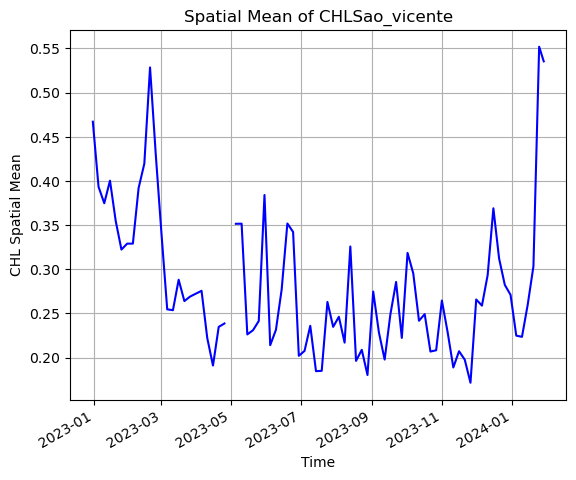

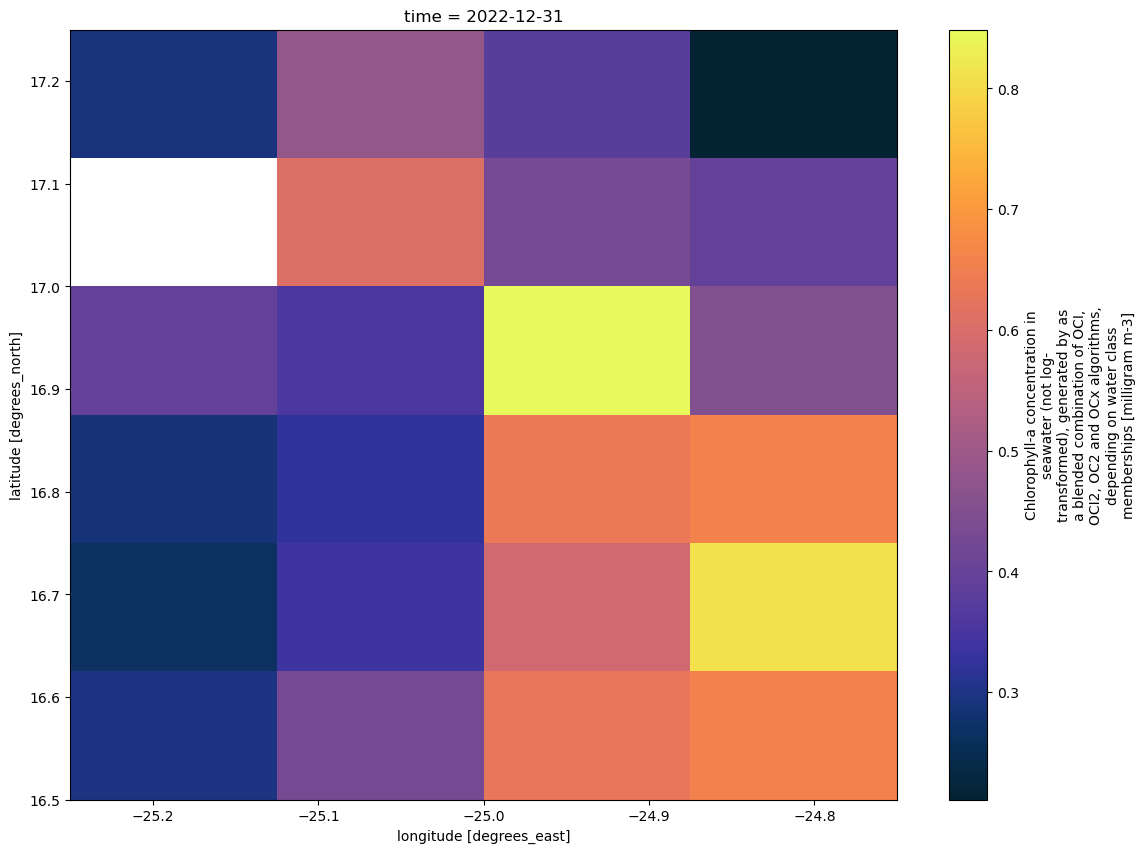

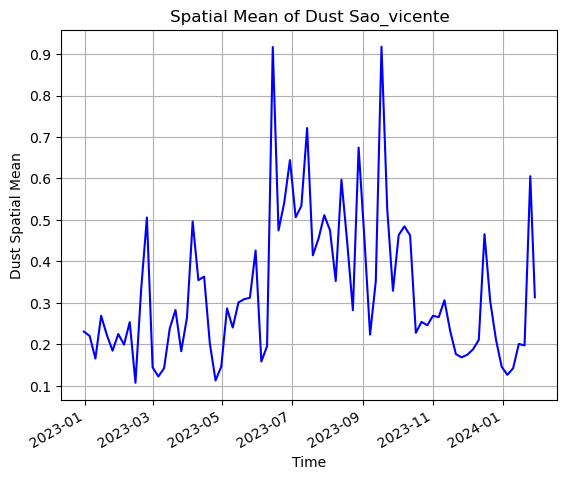

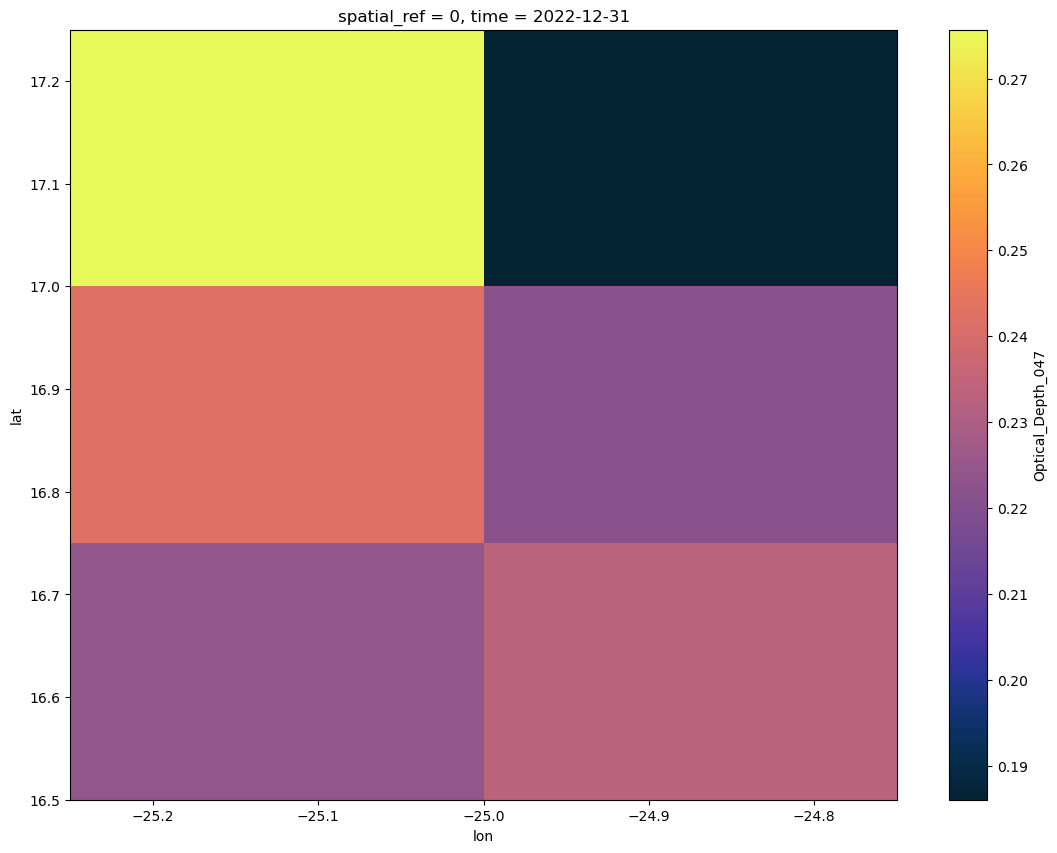

In [10]:
for i in range(5,6):
    latitude_range = (data_mindelo.iloc[i,4], data_mindelo.iloc[i,2])
    longitude_range = (data_mindelo.iloc[i,3], data_mindelo.iloc[i,1])
    print("Latitude range", latitude_range)
    print("Longitude range", longitude_range)
    
    region_name = data_mindelo.iloc[i,0]
    time_range = ("2022-12-01", "2024-03-01")
    chl = plotTimeSeriesRegionCHL(latitude_range, longitude_range, time_range, region_name)
    dust = plotTimeSeriesRegionDust(latitude_range, longitude_range, time_range, region_name)
    
df_saovicente = pd.DataFrame({
    'time': chl.time,
    'chlorophyll': chl.values,
    'dust': dust.values
})
df_saovicente.to_csv("timeseries_saovicente.csv", index = False)
df_saovicente = pd.read_csv("timeseries_saovicente.csv")
print(df_saovicente)

In [11]:
df_east = pd.DataFrame({
    'time': chl.time,
    'chlorophyll': chl.values,
    'dust': dust.values
})

In [12]:
df_east.to_csv("timeseries_north.csv", index = False)

In [13]:
df_east = pd.read_csv("timeseries_north.csv")

In [14]:
df_east

,time,chlorophyll,dust
0,2022-12-31,0.466955,0.230522
1,2023-01-05,0.393249,0.220015
2,2023-01-10,0.374674,0.165424
3,2023-01-15,0.400238,0.268785
4,2023-01-20,0.354607,0.222492
...,...,...,...
75,2024-01-10,0.223438,0.142117
76,2024-01-15,0.259832,0.200747
77,2024-01-20,0.303267,0.197237
78,2024-01-25,0.551836,0.605432


In [15]:
lon_bds = (-26.0, -21.0)
lat_bds = (14.0, 17.5)
debug_max_timesteps = 80

In [16]:
import xarray as xr
import pandas as pd
import numpy as np

import hvplot.xarray
import geoviews as gv

import cartopy
import cmocean
from matplotlib import pyplot as plt

from pathlib import Path

In [17]:
ds_biochl

<xarray.Dataset>
Dimensions:     (time: 80, latitude: 96, longitude: 128)
Coordinates:
  * latitude    (latitude) float64 8.063 8.188 8.313 8.438 ... 19.69 19.81 19.94
  * longitude   (longitude) float64 -27.94 -27.81 -27.69 ... -12.19 -12.06
  * time        (time) datetime64[ns] 2022-12-31 2023-01-05 ... 2024-01-29
Data variables:
    CHL         (time, latitude, longitude) float32 ...
    MICRO       (time, latitude, longitude) float32 ...
    MICRO_BIAS  (time, latitude, longitude) float32 ...
    MICRO_RMSE  (time, latitude, longitude) float32 ...
    NANO        (time, latitude, longitude) float32 ...
    NANO_BIAS   (time, latitude, longitude) float32 ...
    NANO_RMSE   (time, latitude, longitude) float32 ...
    PICO        (time, latitude, longitude) float32 ...
    PICO_BIAS   (time, latitude, longitude) float32 ...
    PICO_RMSE   (time, latitude, longitude) float32 ...
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

In [18]:
import panel as pn
pn.extension()

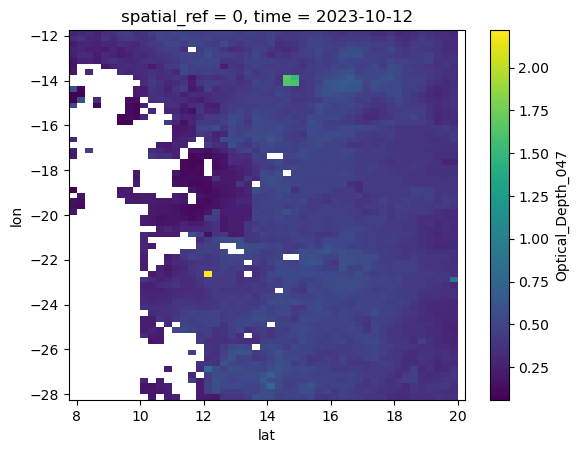

In [19]:
ds_dust = dust_caboverde_coarsen
ds_dust.sel(time="2023-10-14", method ="nearest").Optical_Depth_047.plot.imshow()
plt.show()

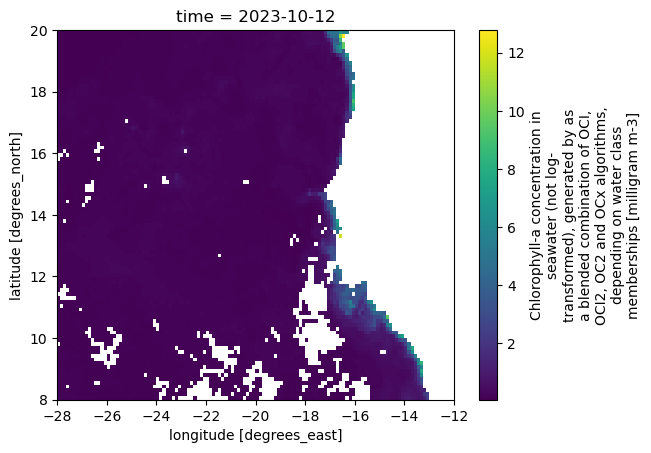

In [20]:
ds_biochl.sel(time="2023-10-14", method ="nearest").CHL.plot.imshow()
plt.show()

In [21]:
ds_biochl = ds_biochl.sel(
    longitude=slice(*lon_bds),
    latitude=slice(*lat_bds),
)

In [22]:
ds_dust
ds_dust = ds_dust.sel(
    lon=slice(*lon_bds),
    lat=slice(*lat_bds),
)

In [23]:
print("number of common timesteps:", len(set(ds_biochl.time.data).intersection(set(ds_dust.time.data))))

number of common timesteps: 80


In [24]:
ds_biochl_time, ds_dust_time = xr.align(ds_biochl.time, ds_dust.time)

In [25]:
ds_biochl_time = ds_biochl_time.isel(time=slice(None, debug_max_timesteps))
ds_dust_time = ds_dust_time.isel(time=slice(None, debug_max_timesteps))

In [26]:
ds_biochl = ds_biochl.sel(time=ds_biochl_time)
ds_biochl = ds_biochl.compute()
ds_biochl

<xarray.Dataset>
Dimensions:     (time: 80, latitude: 28, longitude: 40)
Coordinates:
  * latitude    (latitude) float64 14.06 14.19 14.31 14.44 ... 17.19 17.31 17.44
  * longitude   (longitude) float64 -25.94 -25.81 -25.69 ... -21.19 -21.06
  * time        (time) datetime64[ns] 2022-12-31 2023-01-05 ... 2024-01-29
Data variables:
    CHL         (time, latitude, longitude) float32 0.1797 0.1648 ... 0.1797
    MICRO       (time, latitude, longitude) float32 nan nan ... 0.02663 0.02838
    MICRO_BIAS  (time, latitude, longitude) float32 nan nan ... 0.09833 0.1127
    MICRO_RMSE  (time, latitude, longitude) float32 nan nan ... 0.4634 0.4579
    NANO        (time, latitude, longitude) float32 nan nan ... 0.06164 0.06495
    NANO_BIAS   (time, latitude, longitude) float32 nan nan ... 0.03946 0.02363
    NANO_RMSE   (time, latitude, longitude) float32 nan nan ... 0.3382 0.3384
    PICO        (time, latitude, longitude) float32 nan nan ... 0.08486 0.08634
    PICO_BIAS   (time, latitude, longitude) float32 nan nan ... 0.1478 0.1492
    PICO_RMSE   (time, latitude, longitude) float32 nan nan ... 0.3274 0.3334
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

In [27]:
ds_dust = ds_dust.sel(time=ds_dust_time)
ds_dust = ds_dust.compute()
ds_dust

<xarray.Dataset>
Dimensions:            (time: 80, lon: 20, lat: 14)
Coordinates:
  * lon                (lon) float64 -25.88 -25.62 -25.38 ... -21.38 -21.12
  * lat                (lat) float64 14.12 14.38 14.62 ... 16.88 17.12 17.38
    spatial_ref        int64 0
  * time               (time) datetime64[ns] 2022-12-31 ... 2024-01-29
Data variables:
    Optical_Depth_047  (time, lon, lat) float64 0.144 0.133 ... 0.3916 0.3926
    Optical_Depth_055  (time, lon, lat) float64 0.1321 0.1207 ... 0.3513 0.3523

In [28]:
time_slider = pn.widgets.IntSlider(name='time', start=0, end=ds_biochl.dims["time"] - 1, step=1)

In [29]:
ds_biochl.dims["time"]

80

In [30]:
plt.ioff()

In [46]:
def plot_chl_dust_for_timestep_map(ds_biochl=None, ds_dust=None, timestep=None):
    fig, ax = plt.subplots(
        1, 2,
        subplot_kw={"projection": cartopy.crs.PlateCarree()},
        figsize=(12, 4),
        sharey=True)
    ds_biochl.isel(time=timestep).CHL.plot.contourf(ax=ax[0], cmap=cmocean.cm.algae, vmin = 0, vmax = 2.5) #, vmin=0, vmax=0.7)
    ds_dust.isel(time=timestep).transpose('lat', 'lon').Optical_Depth_047.plot.contourf(ax=ax[1], cmap=cmocean.cm.thermal, vmin = 0, vmax = 1) #, vmin=20, vmax=30)
    ax[0].coastlines()
    ax[1].coastlines()
    ax[0].gridlines()
    ax[1].gridlines()
    ax[0].add_feature(cartopy.feature.LAND, zorder=100)
    ax[1].add_feature(cartopy.feature.LAND, zorder=100)
    fig.tight_layout()
    return fig

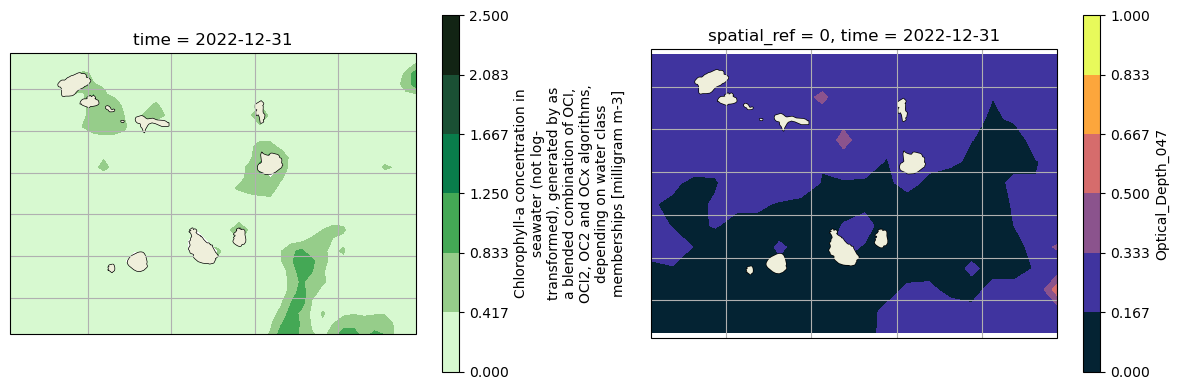

In [47]:
plot_chl_dust_for_timestep_map(ds_biochl=ds_biochl, ds_dust=ds_dust, timestep=0)

In [48]:
plot_maps_bound = pn.bind(plot_chl_dust_for_timestep_map, ds_biochl=ds_biochl, ds_dust=ds_dust, timestep=time_slider)

In [49]:
final_app = pn.Column(
    time_slider,
    pn.pane.Matplotlib(plot_maps_bound),
)

In [50]:
import matplotlib.pyplot
matplotlib.pyplot.close()

In [51]:
pn.panel(final_app).save("dustbiochl.html", embed=True, max_states=800_000, max_opts=100)